In [3]:
import os
import datetime
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Lecture du fichier d'environnement
ENV_FILE = '/home/albane/Cours/Projet Corona/env.yaml'

with open(ENV_FILE) as f:
    params = yaml.load(f) #, Loader=yaml.FullLoader)

# Initialisation des chemins vers les fichiers
ROOT_DIR = os.path.dirname(os.path.abspath(ENV_FILE))
DATA_FILE = os.path.join(ROOT_DIR,
                         params['directories']['processed'],
                         params['files']['all_data'])

# Lecture du fichier de données
epidemie_df = (pd.read_csv(DATA_FILE, parse_dates=['Last Update'])
               .assign(day=lambda _df: _df['Last Update'].dt.date)
               .drop_duplicates(subset=['Country/Region', 'Province/State', 'day'])
               [lambda df: df['day'] <= datetime.date(2020, 3, 20)]
              )

/home/albane/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  """


In [5]:
def get_country(country_or_region):
    epidemie_agg = epidemie_df[epidemie_df['Country/Region'] == country_or_region].groupby(['Country/Region', 'day']).agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'}).reset_index()
    epidemie_agg=epidemie_agg.rename(columns = {'day':'Date', 'Confirmed':'Total confirmed'})
    epidemie_agg["New cases"]=epidemie_agg["Total confirmed"].diff()
    epidemie_agg["Active"]=epidemie_agg["Total confirmed"]-epidemie_agg["Deaths"]-epidemie_agg["Recovered"]
    return(epidemie_agg)

In [6]:
get_country(country_or_region="France").tail()

,Country/Region,Date,Total confirmed,Deaths,Recovered,New cases,Active
30,France,2020-03-16,6645.0,148.0,12.0,2136.0,6485.0
31,France,2020-03-17,7674.0,148.0,12.0,1029.0,7514.0
32,France,2020-03-18,9046.0,148.0,12.0,1372.0,8886.0
33,France,2020-03-19,10883.0,243.0,12.0,1837.0,10628.0
34,France,2020-03-20,12623.0,450.0,12.0,1740.0,12161.0


## Plot COVID-19 comparison between countries

In [75]:
countries_list = ['France','Italy','Spain','Germany','South Korea','Iran','UK','US']

def evol_by_country(countries_to_plot, variable_to_plot):
    fig = plt.gcf()
    fig.set_size_inches(15, 8, forward=True)
    for c in countries_list :
        plt.plot(get_country(c)['Date'], get_country(c)[variable_to_plot], label=c)
    plt.grid(True)
    plt.title("Comparison of the evolution of COVID-19 : %s" % variable_to_plot)
    plt.legend()
    plt.show()


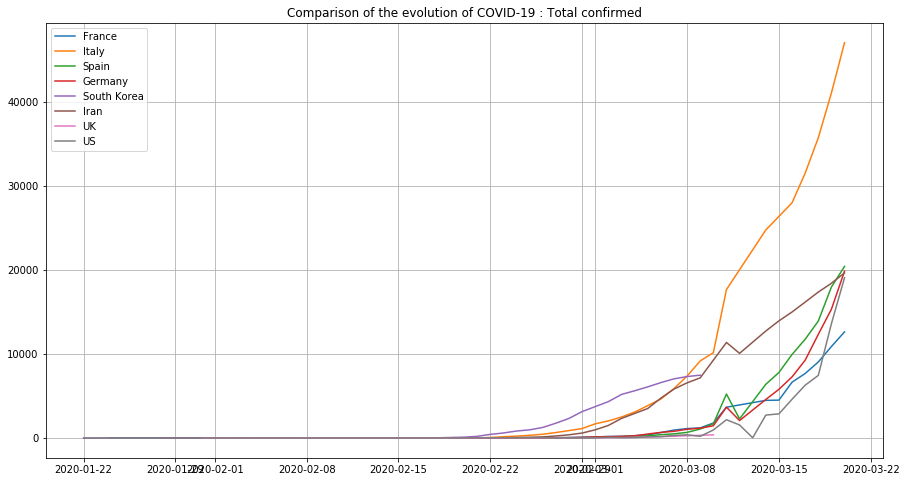

In [76]:
evol_by_country(countries_list,'Total confirmed')

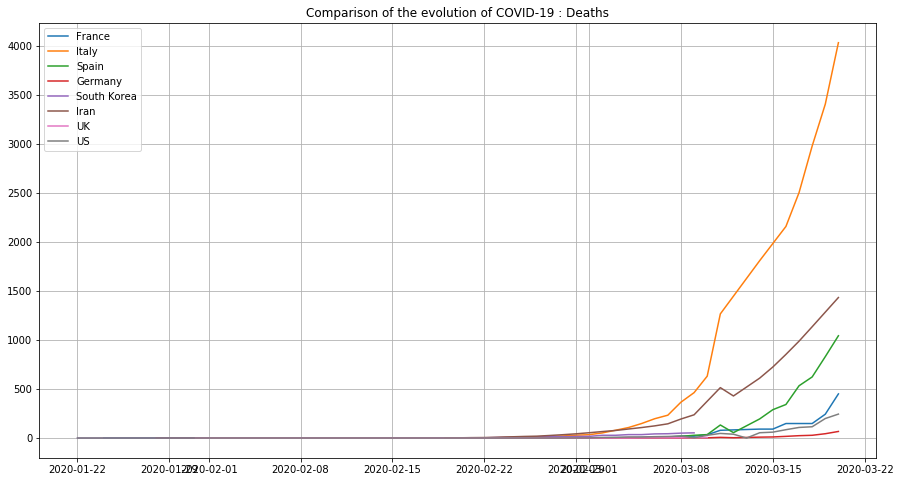

In [77]:
evol_by_country(countries_list,'Deaths')

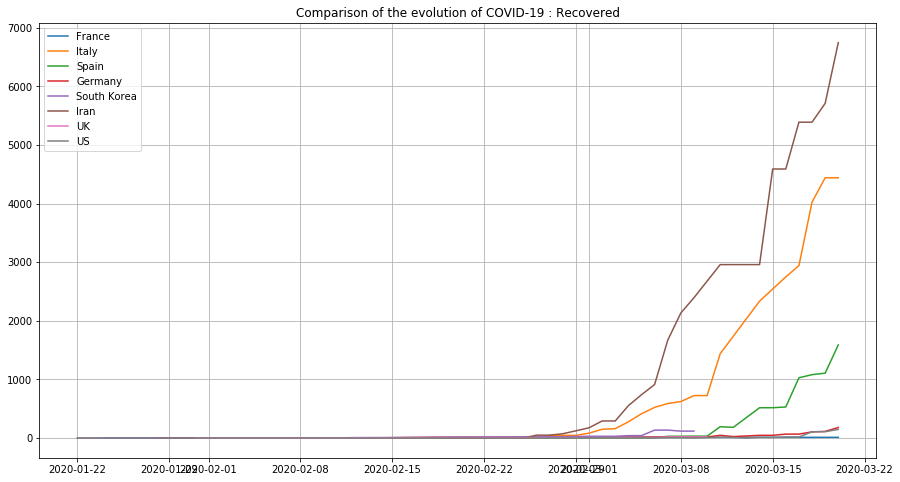

In [78]:
evol_by_country(countries_list,'Recovered')

## Plot COVID-19 evolution for a specific country

In [79]:
def one_country_evol(country_to_plot):
    get_country(country_to_plot).set_index('Date')[['Total confirmed','Deaths','Recovered']].plot(secondary_y=['Deaths','Recovered'],figsize=(15, 10))
    plt.title("Detailed evolution of COVID-19 in %s" % country_to_plot)
    plt.grid(True)
    plt.show()

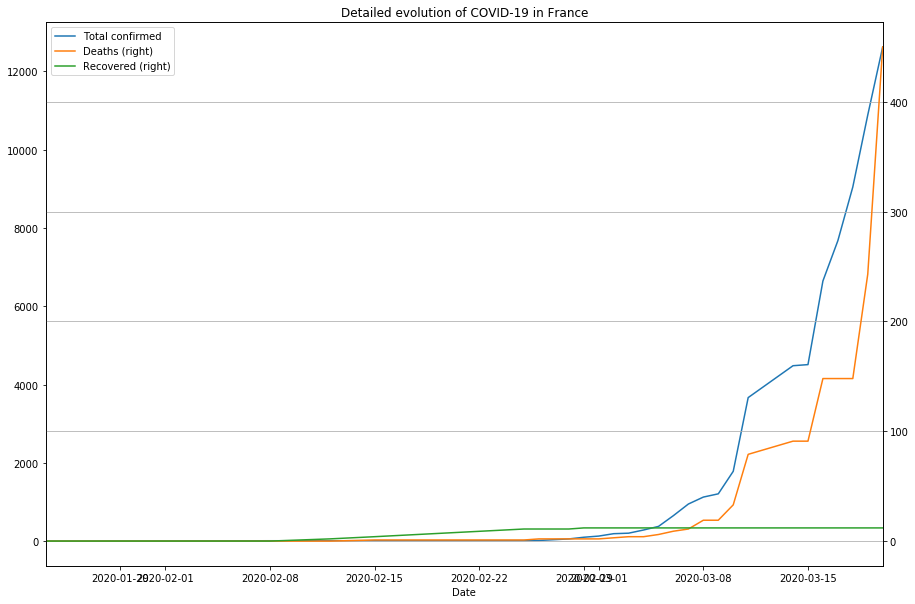

In [80]:
one_country_evol('France')

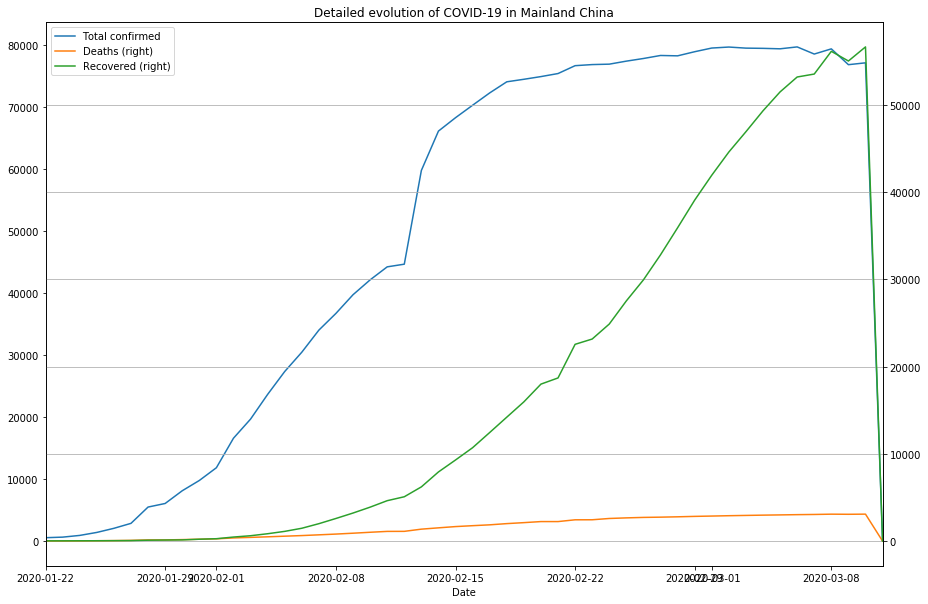

In [81]:
one_country_evol('Mainland China')